<a href="https://colab.research.google.com/github/anomishra/Techademy_Artificial_intelligence/blob/master/Techademy_mnist_data_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective of this program is to predict digits from MNIST data.
http://yann.lecun.com/exdb/mnist/

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


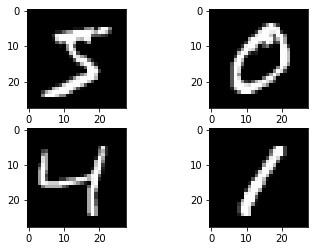

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

#Images are present in 28 x 28 pixel resolution format

In [2]:

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
#data representation
# reshape to be [samples][width][height][channels]

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [9]:
X_train[0].shape

(28, 28, 1)

Gray scale pixel values are between 0 and 255. Scaling of input values when using neural network models oftenly ease calculation and performance. Here we normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [ ]:

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Outputs are obtained between 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.
</br>
Keras function np_utils.to_categorical() will tranform the labels into 0 to 9

In [12]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

inputs (784)

In [13]:
# create model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
!pip install ann_visualizer
!pip install graphviz

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp36-none-any.whl size=4169 sha256=c2b7a038deca0d312009b8713a71ab0ba101632f91a1d7bab88b0cd875c9c821
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [15]:
from ann_visualizer.visualize import ann_viz;

# filename should be in .gv format
ann_viz(model, view=True, filename="network.gv", title="FFNNimage")

In [16]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.7613 - accuracy: 0.8230 - val_loss: 0.1172 - val_accuracy: 0.9643
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1495 - accuracy: 0.9560 - val_loss: 0.0753 - val_accuracy: 0.9770
Epoch 3/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1036 - accuracy: 0.9682 - val_loss: 0.0602 - val_accuracy: 0.9809
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0819 - accuracy: 0.9746 - val_loss: 0.0571 - val_accuracy: 0.9822
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0728 - accuracy: 0.9776 - val_loss: 0.0459 - val_accuracy: 0.9850
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0611 - accuracy: 0.9805 - val_loss: 0.0360 - val_accuracy: 0.9888
Epoch 7/10
60000/60000 [==============================] - 2s 31us/s

In [17]:
# make class predictions with the model
predictions = model.predict_classes(X_test)


In [19]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

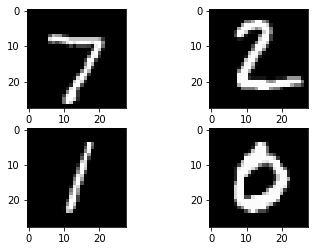

In [20]:

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))

plt.show()

In [21]:
# summarize the first 4 cases
for i in range(4):
	print(predictions[i], y_test[i])

7 7
2 2
1 1
0 0
